In [1]:
import os

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

DATADIR = "./input"

In [2]:
df_train = pd.read_csv(
    os.path.join(DATADIR, "gender_age_train.csv"), index_col="device_id"
)
df_train['is_female'] = (df_train['gender'] == 'F').astype(int)
df_events = pd.read_csv(os.path.join(DATADIR, 'events.csv'), index_col='event_id')
df_train['has_events'] = np.in1d(df_train.index.values, df_events['device_id'].values)
df_train.shape

/home/dragon/kaggle/talking_data/kaggle_days/venv/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(74645, 5)

## Demographic groups

In [3]:
df_train.groupby('group').agg({"age": ["mean", "std"], "is_female": ["mean", "count"]})

age           is_female      
             mean       std      mean count
group                                      
F23-    20.969109  1.746863         1  5050
F24-26  25.095465  0.817833         1  4190
F27-28  27.479474  0.499659         1  3118
F29-32  30.251296  1.111539         1  4628
F33-42  36.653659  2.855417         1  5561
F43+    51.622794  8.071190         1  4194
M22-    20.206597  1.707759         0  7488
M23-26  24.647163  1.120650         0  9605
M27-28  27.476033  0.499471         0  5445
M29-31  29.894103  0.803662         0  7309
M32-38  34.530709  1.932040         0  9476
M39+    47.104184  7.835465         0  8581

Proportion of devices with events: 0.3122647196731194


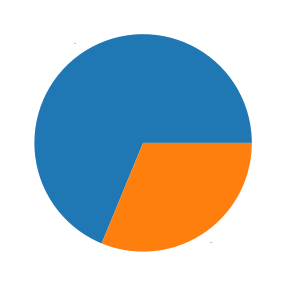

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
df_train['has_events'].value_counts().plot.pie(ax=ax, legend=False, fontsize=0, table=False)
plt.axis('off')

print('Proportion of devices with events: {}'.format(df_train['has_events'].mean()))

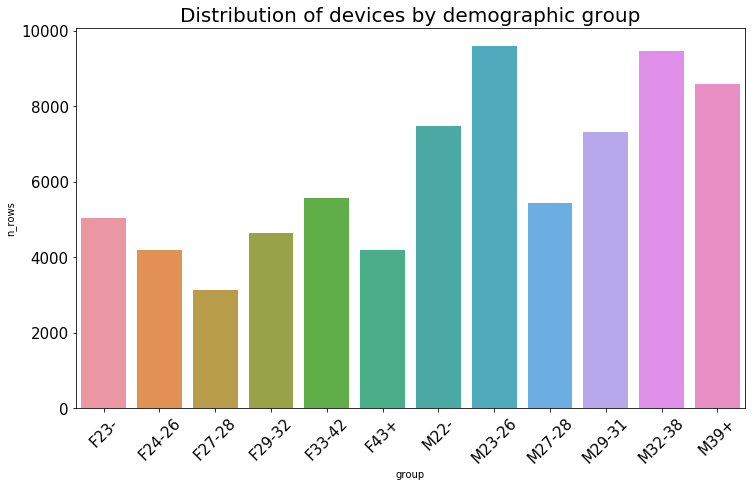

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(12,7))
df = df_train.groupby('group').agg({"age": "count"}).reset_index()
df.rename({"age": "n_rows"}, axis=1, inplace=True)
sns.barplot(x="group", y="n_rows", data=df)
# ax.set(title="Distribution of devices by demographic group")
ax.set_title("Distribution of devices by demographic group", fontsize=20)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
for label in ax.get_xticklabels():
  label.set_rotation(45)

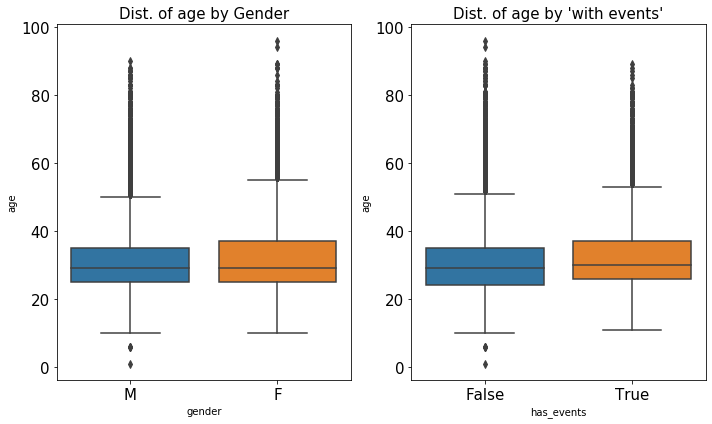

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

ax = axes[0]
sns.boxplot(y="age", x="gender", data=df_train, ax=ax)

ax.set_title("Dist. of age by Gender", fontsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)

ax = axes[1]
sns.boxplot(y="age", x="has_events", data=df_train, ax=ax)

ax.set_title("Dist. of age by 'with events'", fontsize=15)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)

fig.tight_layout()

### Events with or without data

In [7]:
df_train.groupby(['has_events', 'gender']).agg({"is_female": "count"}).reset_index()

,has_events,gender,is_female
0,False,F,18693
1,False,M,32643
2,True,F,8048
3,True,M,15261


In [11]:
print(18693/32643, "ratio female/male in devices with events")
print(8048/15261, "ratio female/male in devices without events")
df = df_train.groupby(['has_events', 'gender']).agg({"is_female": "count"}).reset_index()
cols = ['is_female']
df[cols].div(df[cols].sum(axis=0), axis=1)

0.5726495726495726 ratio female/male in devices with events
0.5273573160343359 ratio female/male in devices without events


,is_female
0,0.250425
1,0.437310
2,0.107817
3,0.204448
